In [33]:
import json
import os
import numpy as np
import copy

In [4]:
path = os.path.abspath(".")

In [71]:
with open (os.path.join(path, "agents_runs_first_eval_withgaetan.json"), "r") as f:
    dict_res_first = json.load(f)

with open (os.path.join(path, "agents_runs_second_eval.json"), "r") as f:
    dict_res_second = json.load(f)
    
with open (os.path.join(path, "agents_runs_third_eval2.json"), "r") as f:
    dict_res_third = json.load(f)
    
with open (os.path.join(path, "agents_runs_safe_max_rho_eval2.json"), "r") as f:
    dict_res_fmr_1 = json.load(f)
with open (os.path.join(path, "agents_runs_safe_max_rho_eval3.json"), "r") as f:
    dict_res_fmr_2 = json.load(f)

def dict_merge(dict1, dict2):
    res = copy.deepcopy(dict1)
    for k in dict2:
        if k not in res:
            res[k] = copy.deepcopy(dict2[k])
        else:
            if isinstance(res[k], dict):
                res[k] = dict_merge(res[k], dict2[k])
            else:
                print(f"error for key in dict2: {k}")
    return res
dict_res_fmr = dict_merge(dict_res_fmr_2, dict_res_fmr_1)

In [43]:
dict_res_fmr.keys()

dict_keys(['0.8', '0.825', '0.85', '0.875', '0.9', '9.925', '0.95', '0.975', '1.0', '1.025', '0.6', '0.625', '0.65', '0.675'])

In [23]:
res_first = {}
for safe_max_rho_, dict_f in dict_res_first.items():
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                res_first[model_nm] = tmp_res_model['score_avg']

In [14]:
res_second = {}
for safe_max_rho_, dict_f in dict_res_second.items():
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                res_second[model_nm] = tmp_res_model['score_avg']

In [72]:
res_third = {}
for safe_max_rho_, dict_f in dict_res_third.items():
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                res_third[model_nm] = tmp_res_model['score_avg']

In [67]:
res_smr = {}
for safe_max_rho_, dict_f in dict_res_fmr.items():
    if float(safe_max_rho_) > 2.:
        # bug in the data I generated: there is 9.975 instead of 0.975
        continue
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                res_smr[(model_nm, safe_max_rho_)] = (tmp_res_model['score_avg'], np.sum(tmp_res_model['n_played']))

In [73]:
np.mean(list(res_third.values()))

-7.201105393517457

In [74]:
np.mean(list(res_second.values()))

3.8581820334126538

In [75]:
sorted(res_third.items(), key=lambda x: x[1])

[('GymEnvWithRecoWithDN_20220708_140216_learning_rate_0', -33.852713878956),
 ('GymEnvWithRecoWithDN_20220708_140237_learning_rate_0', -32.35185524938328),
 ('GymEnvWithRecoWithDN_20220708_145245_learning_rate_0', -26.70077279204935),
 ('GymEnvWithRecoWithDN_20220708_191843_learning_rate_0', -19.732288546911526),
 ('GymEnvWithRecoWithDN_20220708_145303_learning_rate_0', -17.962235734932513),
 ('GymEnvWithRecoWithDN_20220710_144746_learning_rate_0', -17.20135457721523),
 ('GymEnvWithRecoWithDN_20220708_135945_learning_rate_0', -15.803013750901632),
 ('GymEnvWithRecoWithDN_20220708_145319_learning_rate_0', -14.499311349218035),
 ('GymEnvWithRecoWithDN_20220708_144913_learning_rate_0', -13.362311779021125),
 ('GymEnvWithRecoWithDN_20220709_143821_learning_rate_0', -12.634830553081162),
 ('GymEnvWithRecoWithDN_20220708_191404_learning_rate_0', -10.226771744346852),
 ('GymEnvWithRecoWithDN_20220708_191623_learning_rate_0', -10.129287819505329),
 ('GymEnvWithRecoWithDN_20220709_195644_learni

In [25]:
sorted(res_second.items(), key=lambda x: x[1])

[('GymEnvWithRecoWithDN_20220708_145245_learning_rate_0', -14.483168471127795),
 ('GymEnvWithRecoWithDN_20220708_140237_learning_rate_0', -13.110436854039826),
 ('GymEnvWithRecoWithDN_20220708_140216_learning_rate_0', -9.588720687084534),
 ('GymEnvWithRecoWithDN_20220708_145303_learning_rate_0', -6.492831630012134),
 ('GymEnvWithRecoWithDN_20220709_143821_learning_rate_0', -6.120078026927096),
 ('GymEnvWithRecoWithDN_20220710_144746_learning_rate_0', -4.142344989418255),
 ('GymEnvWithRecoWithDN_20220708_145319_learning_rate_0', -2.2408698057109757),
 ('GymEnvWithRecoWithDN_20220708_135945_learning_rate_0', -0.5480947158197492),
 ('GymEnvWithRecoWithDN_20220708_144913_learning_rate_0', 1.5648549019709643),
 ('GymEnvWithRecoWithDN_20220709_195644_learning_rate_0', 2.815732361223233),
 ('GymEnvWithRecoWithDN_20220709_150411_learning_rate_0', 4.9027006815223055),
 ('GymEnvWithRecoWithDN_20220709_143432_learning_rate_0', 8.080601268938278),
 ('PPO_agent2_20220709_152040', 9.30139117661593),

In [60]:
sorted(res_first.items(), key=lambda x: x[1])

[('GymEnvWithRecoWithDN_20220709_195644_learning_rate_0', -22.185810484038658),
 ('GymEnvWithRecoWithDN_20220709_150411_learning_rate_0', -17.064856659157183),
 ('GymEnvWithRecoWithDN_20220708_145245_learning_rate_0', -16.689621819845105),
 ('GymEnvWithRecoWithDN_20220708_135945_learning_rate_0', -15.552010955278224),
 ('PPO_agent1_20220709_152030', -15.114631199438302),
 ('GymEnvWithRecoWithDN_20220708_140237_learning_rate_0', -14.376236155626593),
 ('GymEnvWithRecoWithDN_20220708_140216_learning_rate_0', -13.540336220346932),
 ('PPO_agent3_20220709_152051', -4.601406301136948),
 ('GymEnvWithRecoWithDN_20220708_145303_learning_rate_0', -3.989250028559703),
 ('GymEnvWithRecoWithDN_20220710_144746_learning_rate_0', -0.9769569663197776),
 ('GymEnvWithRecoWithDN_20220708_144913_learning_rate_0', 1.2736277839908712),
 ('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', 1.3295790130852068),
 ('GymEnvWithRecoWithDN_20220709_143821_learning_rate_0', 2.574123870052177),
 ('PPO_agent2_2022

In [69]:
sorted(res_smr.items(), key=lambda x: x[1][1])

[(('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '1.025'),
  (18.649060723722588, 39545)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.85'),
  (20.051498424936124, 46073)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.875'),
  (20.133367221652126, 47135)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.725'),
  (20.476537562309474, 47274)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.75'),
  (21.24325720863463, 48035)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.825'),
  (22.28289383951952, 48078)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.9'),
  (22.62364866037014, 48737)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.95'),
  (25.98449931409219, 49178)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.975'),
  (25.560449366974485, 49585)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.7'),
  (23.58164514634908, 49688)),
 (

In [70]:
sorted(res_smr.items(), key=lambda x: x[1][0])

[(('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '1.025'),
  (18.649060723722588, 39545)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.85'),
  (20.051498424936124, 46073)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.875'),
  (20.133367221652126, 47135)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.725'),
  (20.476537562309474, 47274)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.75'),
  (21.24325720863463, 48035)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.825'),
  (22.28289383951952, 48078)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.9'),
  (22.62364866037014, 48737)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.7'),
  (23.58164514634908, 49688)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.8'),
  (24.16241770746795, 49882)),
 (('GymEnvWithRecoWithDN_20220709_210104_learning_rate_0', '0.6'),
  (24.19965974446233, 50467)),
 (('Gy

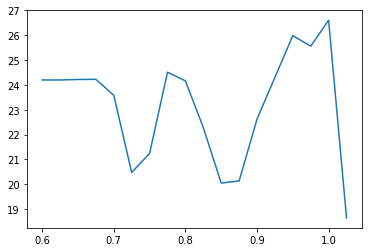

In [66]:
import matplotlib.pyplot as plt
plt.plot([float(el[1]) for el in sorted(res_smr.keys())],
         [res_smr[el] for el in sorted(res_smr.keys())])

In [ ]:
# 0.675
{"scores": [4.183806258244331, 1.8316798528453546,
            0.43853536098582424, 17.49440640978409,
            -0.9199530882837927, -88.43682191749348,
            3.4223651355474516, 0.1002071756253855,
            -96.01732996005138, 1.795698958643257,
            11.516581464772912, 61.82753775858934,
            2.734841639985362, -0.18835913774126561,
            -0.35467405570949395, 79.07802924633053,
            -0.4938530401864434, -1.1700795748282278,
            61.400855658442936, 50.76592429205074,
            0.09002750044648167, 15.68772163238036,
            -71.04872165002081, 22.871406897990575, 
            88.67419382117025, -1.7489875896898888,
            77.91154678380126, 75.45294294770738,
            43.80246539669828, 74.56730635822908,
            24.05310846065443, 29.190714640718653,
            42.54287365355273, 78.21798717491897,
            77.63891600105603, 77.75376224102112,
            77.69001205737749, 73.67709269254972,
            39.65252438421157, 77.65104579524473,
            -1.4053435251047897, 6.440512400271814,
            78.08697149777173, -1.181369972581663,
            78.44336715997113, 78.55088362605541,
            42.85175332171671, 4.124753651645605,
            20.898437300200634, 78.83486839730517,
            18.908871746624357, -0.7850076638089841],
 "score_std": 44.76052708620361,
 "min": -96.01732996005138,
 "max": 79.07802924633053,
 "n_played": [609, 97, 152, 525, 202, 10, 121, 36, 10, 166, 525, 1559, 147, 975, 25,
              2017, 50, 235, 1556, 1557, 79, 510, 127, 1288, 138, 2017, 2017, 2017,
              1551, 2017, 687, 978, 1103, 2017, 2017, 2017, 2017, 2017, 1263, 2017,
              503, 360, 2017, 234, 2017, 2017, 1142, 233, 692, 2017, 523, 244]
}

In [ ]:
{
    "scores": [-0.011599903042765605, 1.6167830937787215,
               -0.0020508833065232355, 17.564174821947034,
               0.2950697194579277, -88.43682191749348,
               3.528292276851147, 0.2723744621626025,
               -96.01732996005138, 1.56956856776317,
               -0.0006635045514200546, 61.88660516043964,
               -0.007449962496211524, 0.4904904945271227,
               -0.05600116669097273, 79.44099498030504,
               -0.04069201080187923, 0.0,
               0.0894203585553015, 51.558994516505535,
               0.0, 16.587400799891995,
               6.052568551694961, -24.85061246801695,
               78.38170697920157, -0.2935238070314095,
               79.22501122370389, 79.30986358566437,
               45.64958130492425, 79.6395283261252,
               24.29200159393541, 29.83451560523885,
               43.02569960322756, 4.500184616426097,
               79.99999942518029, 60.06574657483606,
               79.74406114113195, 79.18848069993106,
               40.39826206973527, 79.37945414604532,
               0.10978401898394452, 79.51633219740911,
               79.43855235065787, -0.0636683082490382,
               79.22845944430631, 78.66646505289422,
               8.223397333506185, 14.731692873067288,
               -0.4757915813238397, 75.40000524935776,
               54.59758881705464, 0.09781968995322643],
    "score_std": 41.464521910933406,
    "min": -96.01732996005138,
    "max": 79.99999942518029,
    "n_played": [525, 91, 142, 525, 210, 10, 123, 41, 10, 160, 279, 1559, 85, 975, 25,
                 2017, 50, 235, 107, 1551, 76, 523, 523, 754, 2017, 2017, 2017,
                 2017, 1551, 2017, 687, 981, 1103, 480, 2017, 1614, 2017, 2017, 1263,
                 2017, 505, 2017, 2017, 234, 2017, 2017, 363, 475, 222, 1913, 1367, 245], 
}